In [69]:
#Using Goole Colab : Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
#sweetvz install
#!pip install sweetviz

In [71]:
# Import modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import sweetviz as sv

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

print('modules imported')

modules imported


##Problem Statement
```
The data given is of the mutual funds in the USA.
The objective of this problem is to predict the ‘basis point spread’ over AAA bonds.
(i.e. feature ‘bonds_aaa’ against each Serial Number)

Basis Point Spread indicates the additional return a mutual fund would give over the AAA-rated bonds.
```

In [72]:
#Feature Description
feat_desc= pd.read_excel('/content/drive/MyDrive/Predicting_Mutual_Fund_Return/MutualFundReturnsDataDictionary.xlsx')
feat_desc

,Features,Description
0,Fund Symbol,Uniques symbol for the mutual fund used for re...
1,Fund Name,Full name of the mutual fund scheme
2,Category,Investment category of the mutual fund
3,Fund Family,Asset management company to which mutual fund ...
4,Investment,Type of investment of the mutual fund scheme
5,Size,Size of the mutual fund based on the total net...
6,Total net assets,Total assets under management for the mutual f...
7,Currency,Currency in which the investments of the mutua...
8,Net Annual Expense Ratio,Expense ratio is the fee that the asset manage...
9,Morningstar Rating,This is the overall fund rating given by the r...


### Load the dataset

In [73]:
# Read the dataset and extract the test  and train data separately
df_train=pd.read_csv('/content/drive/MyDrive/Predicting_Mutual_Fund_Return/train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/Predicting_Mutual_Fund_Return/test.csv')

# Dropping Ids
train_id = df_train['Id']

df_train.drop(['Id'], axis=1, inplace=True)

In [74]:
# Examine first 5 rows
df_train.head()

,Serial Number,total_net_assets,net_annual_expenses_ratio,morningstar_rating,portfolio_cash,portfolio_stocks,portfolio_bonds,portfolio_others,portfolio_preferred,portfolio_convertable,sectors_basic_materials,sectors_consumer_cyclical,sectors_financial_services,sectors_real_estate,sectors_consumer_defensive,sectors_healthcare,sectors_utilities,sectors_communication_services,sectors_energy,sectors_industrials,sectors_technology,price_earning,bonds_us_government,morningstar_return_rating,returns_ytd,returns_2017,returns_2016,returns_2015,returns_2014,returns_2013,returns_2012,returns_2011,returns_2010,morningstar_risk_rating,alpha_3y,beta_3y,mean_annual_return_3y,standard_deviation_3y,sharpe_ratio_3y,treynor_ratio_3y,...,category_72,category_73,category_74,category_75,category_76,category_77,category_78,category_79,category_80,category_81,category_82,category_83,category_84,category_85,category_86,category_87,category_88,category_89,category_90,category_91,category_92,category_93,category_94,category_95,category_96,category_97,category_98,category_99,category_100,category_101,category_102,category_103,category_104,category_105,category_106,category_107,investment_0,investment_1,investment_2,bonds_aaa
0,8372,211000,1.90,3,0.95,99.05,0.00,0.00,0.00,0.00,3.00,15.83,6.77,1.29,6.57,14.65,0.00,3.51,2.20,13.00,33.18,21.92,0.00,3,7.21,29.31,0.67,2.18,12.42,30.90,18.67,-3.74,9.73,3,0.10,1.02,0.94,11.54,0.92,10.27,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
1,5022,98930000,1.57,2,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,-0.58,5.59,-0.59,3.27,11.39,-5.73,10.75,10.44,2.11,3,-0.37,1.03,0.21,3.43,0.53,1.73,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.65
2,3668,440000000,0.53,4,1.71,0.00,98.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3,-0.72,2.77,4.59,0.00,0.00,0.00,0.00,0.00,0.00,3,0.09,0.82,0.12,3.04,0.22,0.79,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,93.20
3,8745,56050000,0.93,3,2.64,31.29,57.06,0.80,7.62,0.58,3.07,6.69,10.17,46.54,4.04,5.48,1.51,2.54,3.40,5.28,11.27,15.86,0.00,3,-2.29,6.84,3.82,-1.92,3.65,-3.02,0.00,0.00,0.00,4,0.72,0.68,0.16,3.39,0.36,1.73,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,2.64
4,17449,173040000,2.26,2,5.24,94.75,0.00,0.01,0.00,0.00,9.42,10.17,20.36,5.42,11.26,8.99,1.25,3.74,6.09,10.76,12.54,14.96,0.00,2,-1.81,25.88,-1.55,-1.22,-4.62,18.83,11.62,-12.17,4.32,3,-0.99,0.91,0.33,11.76,0.28,2.90,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [75]:
# drop serial number
df_train.drop(columns='Serial Number',inplace=True)

In [76]:
# No. of rows and columns
print(df_train.shape)

# Examine the column names
print(df_train.columns)

(9518, 152)
Index(['total_net_assets', 'net_annual_expenses_ratio', 'morningstar_rating',
       'portfolio_cash', 'portfolio_stocks', 'portfolio_bonds',
       'portfolio_others', 'portfolio_preferred', 'portfolio_convertable',
       'sectors_basic_materials',
       ...
       'category_102', 'category_103', 'category_104', 'category_105',
       'category_106', 'category_107', 'investment_0', 'investment_1',
       'investment_2', 'bonds_aaa'],
      dtype='object', length=152)


In [77]:
# Examine no. of non null entries, and column datatype
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9518 entries, 0 to 9517
Columns: 152 entries, total_net_assets to bonds_aaa
dtypes: float64(148), int64(4)
memory usage: 11.0 MB


In [78]:
#Calculate Summary Statistics
df_train.describe()

,total_net_assets,net_annual_expenses_ratio,morningstar_rating,portfolio_cash,portfolio_stocks,portfolio_bonds,portfolio_others,portfolio_preferred,portfolio_convertable,sectors_basic_materials,sectors_consumer_cyclical,sectors_financial_services,sectors_real_estate,sectors_consumer_defensive,sectors_healthcare,sectors_utilities,sectors_communication_services,sectors_energy,sectors_industrials,sectors_technology,price_earning,bonds_us_government,morningstar_return_rating,returns_ytd,returns_2017,returns_2016,returns_2015,returns_2014,returns_2013,returns_2012,returns_2011,returns_2010,morningstar_risk_rating,alpha_3y,beta_3y,mean_annual_return_3y,standard_deviation_3y,sharpe_ratio_3y,treynor_ratio_3y,age_of_fund_yrs,...,category_72,category_73,category_74,category_75,category_76,category_77,category_78,category_79,category_80,category_81,category_82,category_83,category_84,category_85,category_86,category_87,category_88,category_89,category_90,category_91,category_92,category_93,category_94,category_95,category_96,category_97,category_98,category_99,category_100,category_101,category_102,category_103,category_104,category_105,category_106,category_107,investment_0,investment_1,investment_2,bonds_aaa
count,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,...,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00,9518.00
mean,2472999850.69,1.02,2.75,6.85,59.39,30.25,1.58,0.37,0.65,4.28,9.40,12.67,4.61,5.07,7.96,2.49,1.98,6.69,8.87,12.53,12.90,0.00,2.75,0.65,13.30,6.05,-1.56,3.58,10.79,7.51,-0.73,6.64,2.76,-0.34,0.79,0.42,7.90,0.48,5.06,11.07,...,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.02,0.03,0.03,0.01,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.03,0.01,0.47,0.26,0.27,12.42
std,10501652079.25,0.61,1.36,11.58,42.07,38.71,6.42,2.54,5.36,8.39,9.43,12.29,13.69,6.25,9.23,7.27,3.31,15.27,9.29,12.27,9.45,0.00,1.37,3.95,11.29,7.85,5.54,6.30,15.68,8.18,6.11,8.96,1.40,3.07,0.46,0.37,5.36,0.40,71.51,8.87,...,0.06,0.11,0.08,0.07,0.04,0.09,0.06,0.14,0.16,0.16,0.12,0.12,0.07,0.07,0.10,0.09,0.09,0.09,0.09,0.08,0.10,0.08,0.08,0.08,0.08,0.01,0.01,0.02,0.04,0.07,0.04,0.02,0.14,0.11,0.18,0.07,0.50,0.44,0.44,23.57
min,5000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-35.48,-55.31,-40.53,-54.92,-40.55,-52.88,-32.37,-42.53,-50.13,0.00,-33.37,-9.50,-3.41,0.00,-2.92,-5811.39,-0.12,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-7.60
25%,69947500.00,0.61,2.00,1.12,0.59,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.85,0.00,2.00,-1.33,3.92,0.00,-2.74,0.00,0.00,0.00,-1.31,0.00,2.00,-1.42,0.61,0.14,3.17,0.22,1.05,4.41,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,325570000.00,0.96,3.00,2.95,83.18,1.39,0.00,0.00,0.00,3.14,10.60,14.34,1.36,4.55,8.34,0.27,1.13,3.93,9.61,12.71,15.16,0.00,3.00,-0.08,12.14,4.65,0.00,2.19,0.00,6.04,0.00,0.00,3.00,-0.22,0.90,0.38,8.48,0.54,4.22,8.81,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Check for the correlation between the features and do some Hypothesis Testing to see if there is strong association between features.
- Clean the data, remove correlated features and apply some data preprocessing techniques

In [79]:
#EDA using sweetviz

#report = sv.analyze(df_train)
#report.show_html('output_report.html')

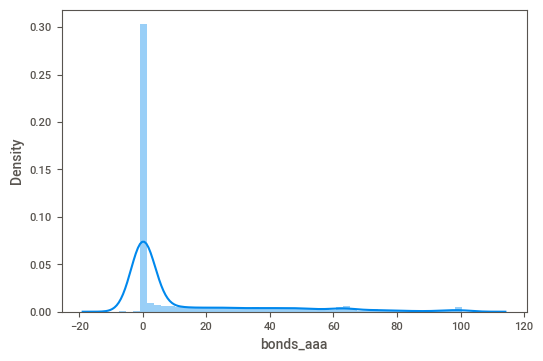

In [80]:
#bonds_aaa - target
sns.distplot(df_train['bonds_aaa'])

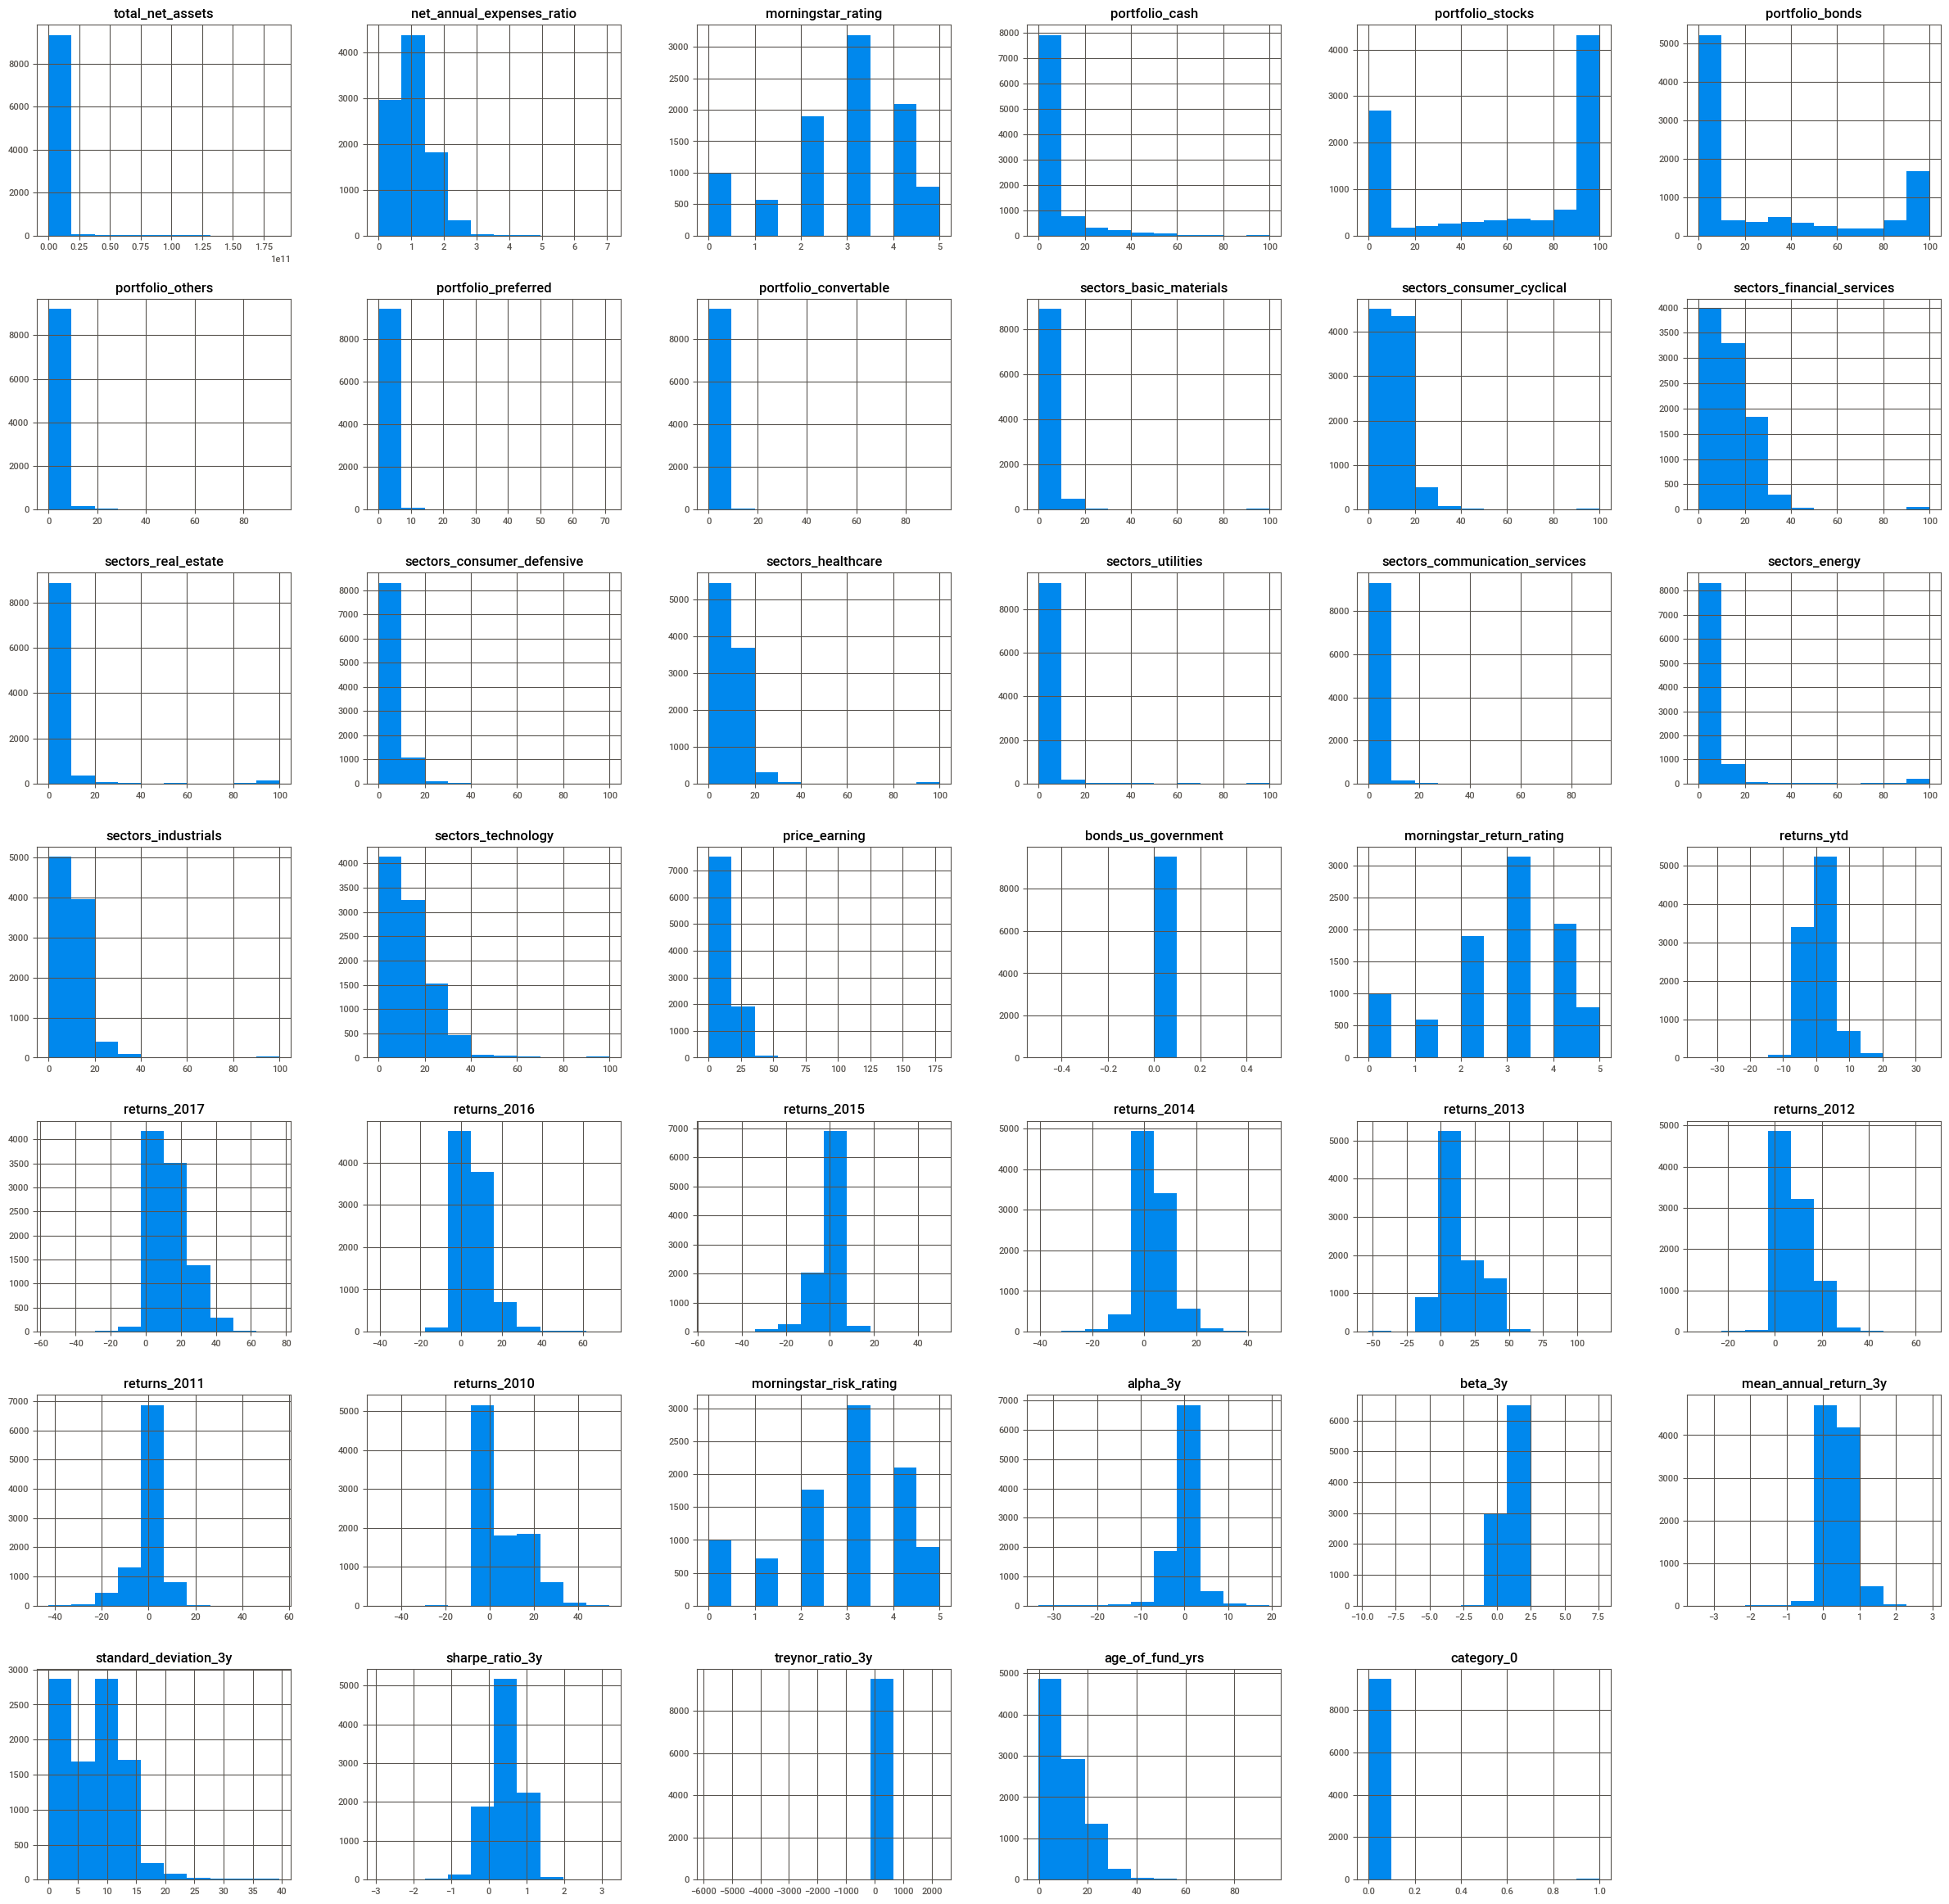

In [81]:
# Data distribution

data_distribution = df_train.iloc[:,:41].hist(figsize=(30,30))
plt.show();


In [82]:
# check the correlation
df_train.corr()
correlation = df_train.corr().abs()

# unstack and sort the values
us_correlation = correlation.unstack()
us_correlation = us_correlation.sort_values(ascending=False)

# max correlated features between 0.75 to 1
max_correlated = us_correlation[(us_correlation>0.75) & (us_correlation<1)]
print(max_correlated)


morningstar_rating         morningstar_return_rating   0.96
morningstar_return_rating  morningstar_rating          0.96
portfolio_stocks           portfolio_bonds             0.92
portfolio_bonds            portfolio_stocks            0.92
category_12                portfolio_convertable       0.90
portfolio_convertable      category_12                 0.90
sharpe_ratio_3y            mean_annual_return_3y       0.77
mean_annual_return_3y      sharpe_ratio_3y             0.77
dtype: float64


In [83]:
# dropping highly correlated features
df_train.drop(columns=['morningstar_rating','portfolio_stocks','category_12','sharpe_ratio_3y'],inplace=True)

### Model building

In [84]:
# independent variable 
X = df_train.drop(columns = 'bonds_aaa')

# target variable 
y = df_train.bonds_aaa

print(X.head())
print(y.head())


#we split 75% of the data to training set while 25% of the data to validation 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=0)

#X_train, X_valid shape
print(X_train.shape)
print(X_valid.shape)

   total_net_assets  net_annual_expenses_ratio  ...  investment_1  investment_2
0            211000                       1.90  ...          1.00          0.00
1          98930000                       1.57  ...          0.00          0.00
2         440000000                       0.53  ...          0.00          0.00
3          56050000                       0.93  ...          0.00          0.00
4         173040000                       2.26  ...          0.00          0.00

[5 rows x 147 columns]
0    0.00
1    0.65
2   93.20
3    2.64
4    0.00
Name: bonds_aaa, dtype: float64
(7138, 147)
(2380, 147)


In [85]:
# fit the model
linreg = LinearRegression()  

#fit_model
linreg.fit(X_train, y_train)   
y_pred = linreg.predict(X_valid)
    
#RMSE
rmse=np.sqrt(mean_squared_error(y_valid,y_pred))
print(rmse)

15.763234093017221


In [86]:
# regularization parameters for grid search
ridge_lambdas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]
lasso_lambdas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]

# Instantiate ridge models
ridge_model = Ridge()

# apply ridge model
ridge_grid = GridSearchCV(estimator=ridge_model, param_grid=dict(alpha=ridge_lambdas))
ridge_grid.fit(X_train, y_train)

# make predictions 
ridge_pred = ridge_grid.predict(X_valid)
ridge_rmse = np.sqrt(mean_squared_error(ridge_pred, y_valid))
print(ridge_rmse)

# Instantiate lasso models
lasso_model = Lasso()

# apply lasso model
lasso_grid = GridSearchCV(estimator=lasso_model, param_grid=dict(alpha=lasso_lambdas))
lasso_grid.fit(X_train, y_train)

# make predictions
lasso_pred = lasso_grid.predict(X_valid)
lasso_rmse = np.sqrt(mean_squared_error(lasso_pred, y_valid))
print(lasso_rmse)

15.775425394600168
15.790698536991773


### Prediction on the test data and creating the submission file.


In [87]:
#the Id column in a separate variable : test_id
test_id = df_test['Id']
df_test.drop(['Id'], axis=1, inplace=True) 

#Test data shape and columns names
print(df_test.shape)
print(df_test.columns)

(2380, 152)
Index(['Serial Number', 'total_net_assets', 'net_annual_expenses_ratio',
       'morningstar_rating', 'portfolio_cash', 'portfolio_stocks',
       'portfolio_bonds', 'portfolio_others', 'portfolio_preferred',
       'portfolio_convertable',
       ...
       'category_101', 'category_102', 'category_103', 'category_104',
       'category_105', 'category_106', 'category_107', 'investment_0',
       'investment_1', 'investment_2'],
      dtype='object', length=152)


In [88]:
# drop serial number
df_test.drop(columns='Serial Number',inplace=True)

# dropping highly correlated features
df_test.drop(columns=['morningstar_rating','portfolio_stocks','category_12','sharpe_ratio_3y'],inplace=True)

In [89]:
#make prediction : bonds_aaa
ytest_pred=linreg.predict(df_test)

#Making df for submission
subm=pd.DataFrame({"Id": test_id, "bonds_aaa": ytest_pred})
print(subm.head())

      Id  bonds_aaa
0  11266       7.83
1  10140      58.23
2     90      -1.08
3   6882       5.70
4   6413      -3.03


In [90]:
# To CSV for submission
subm.to_csv('submission_1.csv',index=False)

#from google.colab import files
#files.download('submission_1.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>